# Map
### Objective: Create a map of the regions and color the regions based on the number of stolen vehicles
Source:
* https://cartographyvectors.com/map/1491-new-zealand-with-regions
* https://towardsdatascience.com/plot-choropleth-maps-with-shapefiles-using-geopandas-a6bf6ade0a49
* https://koordinates.com/layer/105480-nz-police-district-boundaries-29-april-2021/

In [1]:
import os
import pandas as pd

# Set the environment variable
os.environ["CRYPTOGRAPHY_OPENSSL_NO_LEGACY"] = "1"


import geopandas as gpd

from pathlib import Path
import pyproj

In [2]:
from api_keys import api_key_geoapify

## Density mapbox

In [3]:
# Read data file
top_regions = pd.read_csv('../Data/top_regions.csv')
top_regions['latitude'] = 0
top_regions['longitude'] = 0
top_regions

,region,population,density,stolen,latitude,longitude
0,Auckland,1695200,343.09,1638,0,0
1,Canterbury,655000,14.72,660,0,0
2,Bay of Plenty,347700,28.80,446,0,0
3,Wellington,543500,67.52,420,0,0
4,Waikato,513800,21.50,371,0,0
5,Northland,201500,16.11,234,0,0
6,Gisborne,52100,6.21,176,0,0
7,Otago,246000,7.89,139,0,0
8,Manawatū-Whanganui,258200,11.62,139,0,0
9,Taranaki,127300,17.55,112,0,0


In [4]:
# Dependencies
import requests
import json

from pprint import pprint

# Import the API key
from api_keys import api_key_geoapify

In [5]:
for target_city in list(top_regions['region']):

    print(target_city)

    params = {
        "apiKey":api_key_geoapify,
        "format":"json",
        "text":target_city+', New Zealand'
    }

    # Build the endpoint URL
    base_url = f"https://api.geoapify.com/v1/geocode/search?"

    # Run request
    response = requests.get(base_url,params=params).json()

    # Extract lat/lon
    top_regions.loc[top_regions['region']==target_city,'latitude'] = response['results'][0]['lat']
    top_regions.loc[top_regions['region']==target_city,'longitude'] = response['results'][0]['lon']

top_regions

Auckland
Canterbury
Bay of Plenty
Wellington
Waikato
Northland
Gisborne
Otago
Manawatū-Whanganui
Taranaki
Hawke's Bay
Nelson
Southland


,region,population,density,stolen,latitude,longitude
0,Auckland,1695200,343.09,1638,-36.852095,174.763180
1,Canterbury,655000,14.72,660,-43.494176,171.809845
2,Bay of Plenty,347700,28.80,446,-37.950376,176.938287
3,Wellington,543500,67.52,420,-41.288795,174.777211
4,Waikato,513800,21.50,371,-37.779227,175.201032
5,Northland,201500,16.11,234,-41.282339,174.757356
6,Gisborne,52100,6.21,176,-38.661326,178.020649
7,Otago,246000,7.89,139,-45.397505,170.177892
8,Manawatū-Whanganui,258200,11.62,139,-39.926765,175.023077
9,Taranaki,127300,17.55,112,-39.384806,174.197351


In [31]:
import plotly.express as px

px.density_mapbox(
    top_regions,
    lat='latitude',
    lon='longitude',
    z='stolen',
    zoom=4.5,
    height=600,
    width=600,
    center={'lat':-41.3, 'lon':172.5},
    color_continuous_scale='Purples_r',
    title='Stolen vehicles in New Zealand'
    
).update_layout(
    margin={"r":0,"t":60,"l":20,"b":20},
    mapbox_style="carto-positron", # carto-positron, carto-darkmatter
)

## Choropleth
Source: https://datafinder.stats.govt.nz/layer/105134-regional-council-2021-clipped-generalised/

In [7]:
import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
import plotly.express as px #if using plotly
import geopandas as gpd

In [12]:
#set up the file path and read the shapefile data
fp = "../Data/NZ_map_EPSG2193/regional-council-2021-clipped-generalised.shx"
map_df = gpd.read_file(fp)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
map_df = map_df.drop(columns=['REGC2021_V', 'REGC2021_1', 'LAND_AREA_', 'AREA_SQ_KM', 'Shape_Leng'])

In [13]:
top_regions_ch = pd.read_csv('../Data/top_regions.csv')

# Rename regions in DataFrame
top_regions_ch['region'] = [
                'Auckland Region',
                'Bay of Plenty Region',
                'Canterbury Region',
                'Gisborne Region',
                "Hawke's Bay Region",
                'Manawatu-Whanganui Region',
                'Nelson Region',
                'Northland Region',
                'Otago Region',
                'Southland Region',
                'Taranaki Region',
                'Waikato Region',
                'Wellington Region'
]

# Calculate the number of stolen car per 1000 people (Div0 will return NaN which is acceptable)
top_regions_ch = top_regions_ch.assign(
    stolen_per_1000 = 1000*top_regions_ch['stolen']/top_regions_ch['population']
)

top_regions_ch

,region,population,density,stolen,stolen_per_1000
0,Auckland Region,1695200,343.09,1638,0.966258
1,Bay of Plenty Region,655000,14.72,660,1.007634
2,Canterbury Region,347700,28.80,446,1.282715
3,Gisborne Region,543500,67.52,420,0.772769
4,Hawke's Bay Region,513800,21.50,371,0.722071
5,Manawatu-Whanganui Region,201500,16.11,234,1.161290
6,Nelson Region,52100,6.21,176,3.378119
7,Northland Region,246000,7.89,139,0.565041
8,Otago Region,258200,11.62,139,0.538342
9,Southland Region,127300,17.55,112,0.879811


In [14]:
top_regions_geo = pd.merge(map_df, top_regions_ch, how='left', left_on='REGC2021_2', right_on='region')

# Drop unused and redundant columns
top_regions_geo = top_regions_geo.drop(columns=['REGC2021_2', 'density'])

top_regions_geo

,geometry,region,population,stolen,stolen_per_1000
0,"MULTIPOLYGON (((174.27348 -36.28929, 174.27354...",Northland Region,246000.0,139.0,0.565041
1,"MULTIPOLYGON (((174.77946 -36.95661, 174.77950...",Auckland Region,1695200.0,1638.0,0.966258
2,"MULTIPOLYGON (((174.86388 -38.10253, 174.86391...",Waikato Region,54500.0,92.0,1.688073
3,"MULTIPOLYGON (((177.13440 -38.01896, 177.13419...",Bay of Plenty Region,655000.0,660.0,1.007634
4,"MULTIPOLYGON (((178.04937 -38.70605, 178.04974...",Gisborne Region,543500.0,420.0,0.772769
5,"MULTIPOLYGON (((176.98899 -39.85827, 176.98891...",Hawke's Bay Region,513800.0,371.0,0.722071
6,"MULTIPOLYGON (((174.01276 -39.06090, 174.01291...",Taranaki Region,182700.0,100.0,0.547345
7,"POLYGON ((175.54046 -38.47219, 175.56061 -38.4...",Manawatu-Whanganui Region,201500.0,234.0,1.161290
8,"MULTIPOLYGON (((174.77469 -41.34887, 174.77460...",Wellington Region,102400.0,26.0,0.253906
9,"MULTIPOLYGON (((168.88097 -43.86199, 168.88084...",NaN,NaN,NaN,NaN


c:\Users\User\anaconda3\envs\dev\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



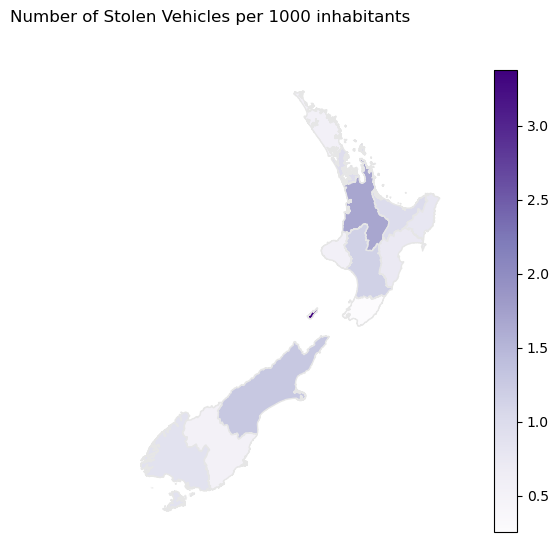

In [15]:
fig, ax = plt.subplots(1, figsize=(10,6))
top_regions_geo.plot(column='stolen_per_1000', cmap='Purples', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

fig.suptitle('Number of Stolen Vehicles per 1000 inhabitants')

plt.show()

In [16]:
top_regions_ch.sort_values('stolen_per_1000', ascending=False).reset_index(drop=True)

,region,population,density,stolen,stolen_per_1000
0,Nelson Region,52100,6.21,176,3.378119
1,Waikato Region,54500,129.15,92,1.688073
2,Canterbury Region,347700,28.80,446,1.282715
3,Manawatu-Whanganui Region,201500,16.11,234,1.161290
4,Bay of Plenty Region,655000,14.72,660,1.007634
5,Auckland Region,1695200,343.09,1638,0.966258
6,Southland Region,127300,17.55,112,0.879811
7,Gisborne Region,543500,67.52,420,0.772769
8,Hawke's Bay Region,513800,21.50,371,0.722071
9,Northland Region,246000,7.89,139,0.565041
